Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


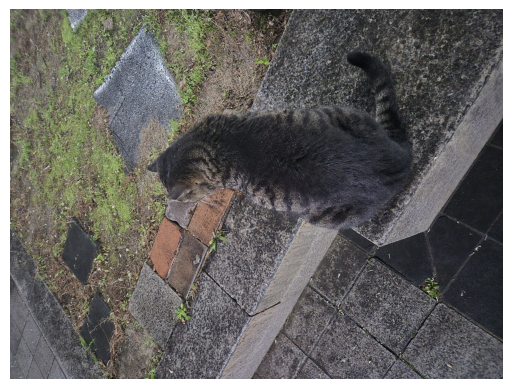

예측된 품종: 코리안 숏헤어


In [12]:
import torch
from PIL import Image
from torchvision import transforms
from google.colab import drive
import matplotlib.pyplot as plt  # 이미지 출력용


def load_complete_model(model_path, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """전체 모델 객체를 로드하는 함수"""

    # 전체 모델 로드 (아키텍처 정의 불필요)
    model = torch.load(model_path, map_location=device, weights_only=False)
    model.to(device)
    model.eval()

    return model

def predict_with_complete_model(model, image_path, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """전체 모델로 예측하는 함수"""

    # 이미지 전처리 (학습 시와 동일)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # 이미지 로드 및 전처리
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)


    # 예측
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        predicted_class_idx = torch.argmax(outputs, dim=1).item()
        confidence = probabilities[predicted_class_idx].item()

    return predicted_class_idx, confidence, probabilities

def show_image(image_path):
    """이미지를 화면에 출력하는 함수"""
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.axis('off')
    plt.show()

labels = [
    "노르웨이숲",
    "래그돌",
    "러시안블루",
    "먼치킨",
    "스코티쉬 스트레이드",
    "스코티쉬 폴드",
    "시암",
    "코리안 숏헤어",
    "터키시 앙고라",
    "페르시안"
]

'''
0: 노르웨이숲
1: 래그돌
2: 러시안블루
3: 먼치킨
4: 스코티쉬 스트레이드
5: 스코티쉬 폴드
6: 시암
7: 코리안 숏헤어
8: 터키시 앙고라
9: 페르시안
'''


drive.mount('/content/drive')

# 사용 예제
model_path = "/content/drive/My Drive/mobilenetv3_complete_model3.pth"
model = load_complete_model(model_path)

# 예측 실행
image_path = "/content/drive/My Drive/kucat.jpg"
pred_idx, confidence, all_probs = predict_with_complete_model(model, image_path)

show_image(image_path)

print(f"예측된 품종: {labels[pred_idx]}")